# EOF analysis of surface freshwater content & analysis of modes

This notebook includes the work of EOF decomposition on surface freshwater content (FWC), the analysis and explainations of each modes.

* EOF(FWC) --> different modes
* Investigate the impact of atmos. patterns
* The role of freshwater components in each modes 

# Content
1. [**Method & data**](#Method-&-data)
 2. [Surface freshwater content (FWC)](#Surface-freshwater-content)
 2. [Other data helped to explain the result](#Other-data-helped-to-explain-the-result)
1. [**EOF decomposition of FWC**](#EOF-decomposition-of-FWC)
 2. [Result: expvar, spatial patterns, pcs](#Result:-expvar,-spatial-patterns,-pcs)
 2. [If I don't "dtrend" ?](#If-I-don't-"dtrend"-?)
1. [**Explainations of each mode**](#Explainations-of-each-mode)
 2. [First mode: Dipole Anomaly](#First-mode:-Dipole-Anomaly)
 2. [Second mode: interannual NAO signal](#Second-mode:-interannual-NAO-signal)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Motivation

* $\mathsf{Ba_d}$ and $\mathsf{\delta^{18}O}$ are important because they can diagnose the variability of Arctic ocean freshwater (FW) by saying the change of FW components (e.g. runoff from different rivers, Sea-ice melt/formation).
* So the simulated $\mathsf{Ba_d}$ and $\mathsf{\delta^{18}O}$ values should also achieve that functionality.
* So we should know, for a certain "FW variability pattern", how well can simulated $\mathsf{Ba_d}$ and $\mathsf{\delta^{18}O}$ expalain. And how the explaination can contribute to the science.

* Here the "FW variability pattern" will be provided by the EOF modes of freshwater content (FWC).
* This work is considered as a process based analysis + new understanding of FWC theories through model simulations.

# Method

## Freshwater content (FWC)

** The definition of FWC **
$$
FWC = \int^{z}_{0}{\left( 1-\frac{S(z)}{S_{ref}} \right)dz}
$$

* $S_{ref}$ is 34.8 as the end-member of Atlantic water
* $S(z)$ is the salinity profile as a function of $z$
* $z$ is deptht(23), about 130m.
* It only measures liquid phase freshwater

** What makes surface FWC to change **

* Re-distribution of FW components (advection)
* Ekman transport.
* Sea-ice melt/formation.
* Change of runoff/precip. input (less important for a 10-year's investigation)

<img src="../../_figures/FWC_sketch.png" width=900 align="center"/>
<center>----------------------</center> 
<center>Sketches of FWC increases due to (a) Redistribution of freshwater component, (b) Ekman transport and (c) Sea-ice melt/formation.</center> 

<center>(b) and (c) were inspired by Proshutinsky et al.(2010).</center> 

*Proshutinsky et al. (2010) Freshwater transformations in the Beaufort Gyre and model intercomparison results. AOMIP Workshop #14.*

** How did I calculate ** 

* Five-day vosaline files (huge) -> monthly mean files
* Got `nav_lev` from `mesh_zgr.nc`
* Applied `numpy.trapz` for vosaline[:24, i, j], finally loop over time. 

## Empirical Orthognal Function (EOF)

** Intro. **

* EOF is essentially an extended Principal Component Analysis (PCA) to 3D vars.
* EOF is widely used to diagnose possible spatial patterns of variability and how they change with time.
* The saperation done by EOF is "mathmatically" orthognal, there is no guarantee on science, but usually, statistical modes have some connection with physical patterns.

** Pre-processing**

* Remove the monthly mean signal (use the anomaly).
* Remove the linear trend (`scipy.signal.detrend`).

** Averages **

* All spatial averages are weighted by the area of the model grid.
* All depth averages are weighted by the vertical scale of model grid.

# Result

** First 3 EOF modes **

<img src="../../_publish/eof/EOF_mode1.png" width=900 align="center"/>
<img src="../../_publish/eof/EOF_mode2.png" width=900 align="center"/>
<img src="../../_publish/eof/EOF_mode3.png" width=900 align="center"/>

# Discussion

## Methods applied

** Composite anomaly **

* The difference between composites of high and low phases of a timeseries of a variable.
* Here $PC > 1$ and $PC < -1$ are defined as high and low phases. 
* Here for all three modes, the definition above puts 25-35% of result into high/low phase composites (and 30-50% are neutral).
* Two sample Student-t test is applied to estimate would "high" and "low" be in different totals.

** Power spectrum **

* Estimates the spectral power distribution (SPD) of a signal (here the PCs) on each frequency unit (here cycle per month). If a frequency band has the highest spectral power, then the PC has the biggest variability on that frequency.
* Power spectrum is calculated through `numpy.fft.fft`.
* (Red/White test can be applied, but so far don't know how to do that)

** Correlation **

* Traditional Pearson correlation (`scipy.stats.stats.pearsonr`). Significance are estimated by Student's t-distribution test.

## Mode I

** Mode I spatial pattern and pc **

<img src="../../_publish/eof/EOF_mode1.png" width=900 align="center"/>

From the mode I spatial pattern:
* Positive FWC anomaly at central Arctic, East Greenland Sea and CAA.
* Negative FWC anomaly at Makarov Basin and coastal Canadia Basin.
* The PC is highly correlated with the mean ocean velocity in TDS region, the later is considered as TDS intensity.
* The power spectrum shows that the varibility of mode I is mainly on the 1/6 cpm frequency.  

------------------------------

** The physical meaning of mode I **

<img src="../../_publish/eof/mode1_atmos.png" width=900 align="center"/>

From the Composite anomaly of SLP:
* Mode I co-occur with positive slp anomaly at Beaufort Sea, CAA, North Atlantic and negative anomaly at Eurasian Basin. 
* The composite anomaly of 2m-T has a positive pattern at Chukchi Sea and central Arctic which could potentially reduce the sea-ice cover.

<img src="../../_publish/eof/mode1_ssh_emp.png" width=900 align="center"/>

From the composite anomaly of ssh, ocean u/v and wind stress curl
* ...............
* ...............

Considering the SLP anomaly pattern and the strong corr. between mode I PC and TDS intensity, the physical meaning of mode I could be dipole anomaly. 

------------------------------

** Composite anomaly of tracers and tracer transport**

<img src="../../_publish/eof/mode1_trc.png" width=900 align="center"/>

From the Composite anomaly of $\mathsf{Ba_d}$ and $\mathsf{\delta^{18}O}$:
* Positive $\mathsf{Ba_d}$ anomaly in the Central Arctic and coastal East Siberian Sea.
* Negative $\mathsf{Ba_d}$ anomaly in CAA and Makarov Basin.
* Positive $\mathsf{\delta^{18}O}$ anomaly in central Arctic, Makarove Basin and coastal Laptev Sea.
* Negative $\mathsf{\delta^{18}O}$ anomaly in CAA, East Greenland Sea and the region between 2 positive $\mathsf{\delta^{18}O}$ patterns

<img src="../../_publish/eof/mode1_adv.png" width=900 align="center"/>


** Mode 1 is under the impact of Arctic atmospheric Dipole Anomaly (DA)**

**What is DA**
+ **DA** played an important role in the summer 2007 sea-ice minimum.
+ Defined as the second mode of 20N-90N monthly mean SLP EOF
    - Wu et al. (2006)
>   <img src="../../_figures/DA_Wu2006.PNG" width=250 align="left"/>


**Why mode 1 is DA**
+ The SLP composite anomaly shows a **DA**-like pattern.
+ Mode 1 has good correlation with TDS intensity, The correlation between TDS intensity and SLP/GPH show a **DA**-like pattern.
    - According to Wang et al. (2009): 
    >During a positive phase of the DA (i.e., the SLP has a positive anomaly in the Canadian Archipelago and negative one in the Barents Sea), the anomalous meridional wind blows from the western to the eastern Arctic, favorable to the Trans-polar Drift Stream (TDS) that flushes sea ice out of the Arctic into the Barents and Greenland seas. [Wu et al., 2006; Watanabe et al., 2006]  
+ Both mode 1 and **DA** were significant from 2007-2008 (Wang et al., 2009).

[1] *Wu et al. (2006), Dipole Anomaly in the winter Arctic atmosphere and its association with Arctic sea ice motion. J. Climate, **19**.*

[2] *Watanabe et al. (2006), Arctic dipole anomaly and its contribution to sea ice export from the Arctic Ocean in the 20th century, Geophys. Res. Lett., **33**(L23703).*

[3] *Wang et al. (2009), Is the Dipole Anomaly a major driver to record lows in Arctic summer sea ice extent?. Geophys. Res. Lett. **36**(5) .*

Under the control of **DA**, the surface ocean shows the following change:
* Very strong TDS
* Stronger "conveyor belt" from Laptev Sea to Central Arctic and Beaufort Gyre.
* Stronger off shore current at Beaufort Sea continental shelf.
* Strong Beaufort Gyre.
* Anti-cyclonic flow anomaly at CAA, weaker BG-Baffin Bay flow.
* Stronger eastward flow at EU continental shelf.
* Less Pacific inflow


For sea-ice:
* **DA** enhances south wind, makes air temp. higher, more Sea-ice melt at central Arctic and Kara Sea
* No significant SST change, can only be found in air temp. 

Under the control of **DA**:
* More NA runoff goes to TDS and BG less will go to CAA
* More EU runoff goes to TDS and BG
* More runoff in East Siberian Sea, but less Pacific inflow, FWC balanced.
* More sea-ice melt water in Central Arctic.
* In total, more liquid FW goes to North Atlantic under positive **DA** phase

<img src="../../_figures/mode1_draft.jpg" width=500 align="center"/>

## Second mode: interannual NAO signal

* Negative correlated (-0.27, 0.01) with Beaufort Sea SSH.
* Not a significant with other feature/indx.

* Not significantly correlated (0.13, 0.13) with NAO index.
* Positively correlated (0.51/0.37, 0.01) with 24-month centered/backward moving averaged NAO index.

<img src="../../_publish/eof/EOF_mode2.png" width=900 align="center"/>

------------------------------

** The physical meaning of mode I **

<img src="../../_publish/eof/mode2_atmos.png" width=900 align="center"/>
<img src="../../_publish/eof/mode2_ssh_emp.png" width=900 align="center"/>

------------------------------

** Composite anomaly of tracers and tracer transport**

<img src="../../_publish/eof/mode2_trc.png" width=900 align="center"/>
<img src="../../_publish/eof/mode2_adv.png" width=900 align="center"/>

In [38]:
# # AO
# MAT = scipy.io.loadmat('../../_data/Exchange/NOAA-CPC_AO.mat')
# AO_NOAA = MAT['data'][((2002-1950)*12):((2013-1950)*12+12), 2]
# MAT = scipy.io.loadmat('../../_data/Exchange/NOAA-CPC_NAO.mat')
# NAO_NOAA= MAT['data'][((2002-1950)*12):((2015-1950)*12+12), 2]
# NAO_NOAA2= MAT['data'][((2001-1950)*12):((2014-1950)*12+12), 2]
# MAT = scipy.io.loadmat('../../_data/Exchange/AO_inds.mat')
# AO_ANHA4 = MAT['AO_index'][0, :]
# # array NAO_NOAA iss from 2000-2013
# NAO_RM1 = np.zeros([144]); NAO_RM1[NAO_RM1==0]=np.nan
# for i in range(144): 
#     NAO_RM1[i] = np.mean(NAO_NOAA[i:i+24])
# NAO_RM2 = np.zeros([144]); NAO_RM2[NAO_RM2==0]=np.nan
# NAO_RM2[:] = np.convolve(NAO_NOAA2, np.ones((24,))/24.0, mode='valid')[1:]

In [39]:
# fig = plt.figure(figsize=(14, 4))
# ax = fig.gca()
# ax.grid(linestyle=':')
# ax.yaxis.grid(False)
# ax.spines["top"].set_visible(False)
# ax.spines["bottom"].set_visible(False) 
# ax.spines["right"].set_visible(False)
# ax.set_xlim([date_list[0], date_list[143]])
# ax.set_ylim([-2.5, 2.5])
# ax.set_ylabel('NAO Index', fontsize=14)
# ax.xaxis.set_tick_params(labelsize=14)
# ax.yaxis.set_tick_params(labelsize=14)
# [i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
# ax.tick_params(axis="both", which="both", bottom="off", top="off",    
#             labelbottom="on", left="off", right="off", labelleft="on")

# ax.plot(date_list, NAO_NOAA[12:-12], color='gray', ls='-', lw=2, label='original')
# ax.plot(date_list, NAO_RM1, 'k-', lw=3.5, label='Backward moving averaged')
# ax.plot(date_list, NAO_RM2, 'k--', lw=3.5, label='Centered moving averaged')

# LG = ax.legend(numpoints=1, bbox_to_anchor=(0.05, 1.0), loc=2, borderaxespad=0., prop={'size':14}); LG.draw_frame(False)
# ax.set_title('Original index v.s. Moving averaged index', fontsize=16)

**Mode 2 is controled by the Interannual varibility of North Atlantic Oscillation (NAO)**

**Typical NAO patterns** 
<img src="../../_figures/NAO_Hilmer.PNG" width=800 align="center"/> *Hilmer, M. and T. Jung (2000) Evidence for a recent change in the link between the North Atlantic Oscillation and Arctic sea ice export. Geophys. Res. Lett. **27**(7): 989-992.*

* ANHA4-GDPS SLP composite anomaly shows a NAO-like pattern.
* It is interannual varibility is because Mode 2 PC is possitivly correlated with 24-month moving averaged NAO index.

In mode 2 case:
* The western side of Beaufort Gyre is spined down, but the eastern side is intensified.
* Anti-cyclonic flow in Chukchi Sea 
* Stronger transport from Canada Basin to Baffin Bay.
* Stronger transport from Laptev Sea to Chukchi Sea.

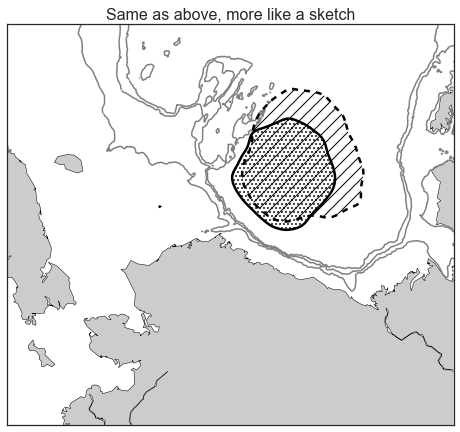

In [55]:
# ETOPO2_Arctic=scipy.io.loadmat('../../_libs/ETOPO2_Arctic.mat')
# ETOPO2_CAA=scipy.io.loadmat('../../_libs/ETOPO2_CAA.mat')
# lon_arctic=ETOPO2_Arctic['lon_arctic']
# lat_arctic=ETOPO2_Arctic['lat_arctic']
# topo_arctic=ETOPO2_Arctic['topo_arctic']
# res_unit=3
# lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
# lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
# topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1 
# #
# SSH_p = np.nanmean(ssh_ori[PC[1, :]>0, :, :], 0); SSH_p[nav_lat<71.5]=np.nan
# SSH_n = np.nanmean(ssh_ori[PC[1, :]<-0, :, :], 0); SSH_n[nav_lat<71.5]=np.nan
# #
# fig=plt.figure(figsize=(8, 8));
# ax1 = fig.gca()
# proj = Basemap(llcrnrlon=-170., llcrnrlat=60., urcrnrlon=-110., urcrnrlat=80.,
#                resolution='l',area_thresh=1000.,projection='lcc', lat_1=60.,lat_2=80.,lat_0=75.,lon_0=-140., ax=ax1)
# proj.fillcontinents(color='0.8', lake_color=None)
# proj.drawcoastlines(linewidth=0.5, color='k')

# x, y = proj(nav_lon, nav_lat)
# topox, topoy=proj(lon_arctic, lat_arctic)
# CS = proj.contourf(x, y, SSH_n, [-0.37, 0], hatches=['//', ' '], colors='none', zorder=4)
# proj.contour(x, y, SSH_n, [-0.37], linewidths=2.5, colors='k', zorder=4)
# proj.contourf(x, y, SSH_p, [-0.37, 0], hatches=['...', ' '], colors='none', zorder=4)
# proj.contour(x, y, SSH_p, [-0.37], linewidths=2.5, linestyles='-', colors='k', zorder=4)
# proj.contour(topox, topoy, topo_arctic, [100, 500, 1000], colors=('gray',), linewidths=1.5)
# ax1.set_title('Same as above, more like a sketch', fontsize=16)

* NA runoff goes to CAA and Baffin Bay.
* East Siberian Sea runoff goes to Laptev Sea.
* Runoff in Laptev Sea goes to the shifted Beaufort Gyre and heading Fram Strait
* More Pacific inflow accumulates in Chukchi Sea.
<img src="../../_figures/mode2_draft.jpg" width=500 align="center"/>

## Third Mode: Synoptic scale Beaufort Sea High

* **Very good positive** (0.53, 0.01) with Beaufort Gyre SSH

<img src="../../_publish/eof/EOF_mode3.png" width=900 align="center"/>

------------------------------

** The physical meaning of mode I **

<img src="../../_publish/eof/mode3_atmos.png" width=900 align="center"/>
<img src="../../_publish/eof/mode3_ssh_emp.png" width=900 align="center"/>

------------------------------

** Composite anomaly of tracers and tracer transport**

<img src="../../_publish/eof/mode3_trc.png" width=900 align="center"/>
<img src="../../_publish/eof/mode3_adv.png" width=900 align="center"/>

Mode 3 is characterized by a **strong Beaufort Sea High (BSH)** 

In mode 3 case:
* Strong Beaufort Gyre
* Weaker transport from Canada Basin to Baffin Bay 

* In general, freshwater is hold by BG and less goes to Atlantic Ocean
* NA runoff accumulates in BG and partially being transported to the East Siberian Sea
* East Siberian Sea and Laptev Sea runoff are accumulating. 
* The total transport of NA runoff through CAA is reduced.

<img src="../../_figures/mode3_draft.jpg" width=500 align="center"/>